<a href="https://colab.research.google.com/github/hosein-ald/scrna/blob/main/scRNA_seq_sample2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install anndata scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 54.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [14]:
!wget "https://cf.10xgenomics.com/samples/cell-vdj/8.0.1/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5" -O /content/10k_5p_Human_diseased_PBMC_ALL_Fresh.tar.gz


--2025-03-07 10:44:35--  https://cf.10xgenomics.com/samples/cell-vdj/8.0.1/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65402953 (62M) [application/x-hdf5]
Saving to: ‘/content/10k_5p_Human_diseased_PBMC_ALL_Fresh.tar.gz’

/content/10k_5p_Hum 100%[===================>]  62.37M   194MB/s    in 0.3s    

2025-03-07 10:44:35 (194 MB/s) - ‘/content/10k_5p_Human_diseased_PBMC_ALL_Fresh.tar.gz’ saved [65402953/65402953]



In [15]:
!file /content/10k_5p_Human_diseased_PBMC_ALL_Fresh.tar.gz


/content/10k_5p_Human_diseased_PBMC_ALL_Fresh.tar.gz: Hierarchical Data Format (version 5) data


In [16]:
!tar -xzvf /content/10k_5p_Human_diseased_PBMC_ALL_Fresh.tar.gz -C /content/



gzip: stdin: not in gzip format
tar: Child returned status 1
tar: Error is not recoverable: exiting now


In [19]:
data_path = "/content/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5"

In [21]:
import scanpy as sc
adata = sc.read_10x_h5("/content/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5")

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [22]:
adata.var_names_make_unique()

In [23]:
import scanpy as sc
adata = sc.read_10x_h5("/content/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5")


/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [24]:
adata.var_names_make_unique()


In [25]:
adata

AnnData object with n_obs × n_vars = 13853 × 38606
    var: 'gene_ids', 'feature_types', 'genome'

In [26]:
adata.var

,gene_ids,feature_types,genome
DDX11L2,ENSG00000290825,Gene Expression,GRCh38
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
ENSG00000290826,ENSG00000290826,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
...,...,...,...
ENSG00000277836,ENSG00000277836,Gene Expression,GRCh38
ENSG00000278633,ENSG00000278633,Gene Expression,GRCh38
ENSG00000276017,ENSG00000276017,Gene Expression,GRCh38
ENSG00000278817,ENSG00000278817,Gene Expression,GRCh38


In [28]:
adata.X

<13853x38606 sparse matrix of type '<class 'numpy.float32'>'
	with 45106351 stored elements in Compressed Sparse Row format>

In [32]:
import numpy as np

# Identify mitochondrial genes by prefix 'MT-'
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
# Create a new boolean column in adata.var
adata.var['mt'] = mt_gene_mask


sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=['mt'],  # Use the name of the new column
    inplace=True
)


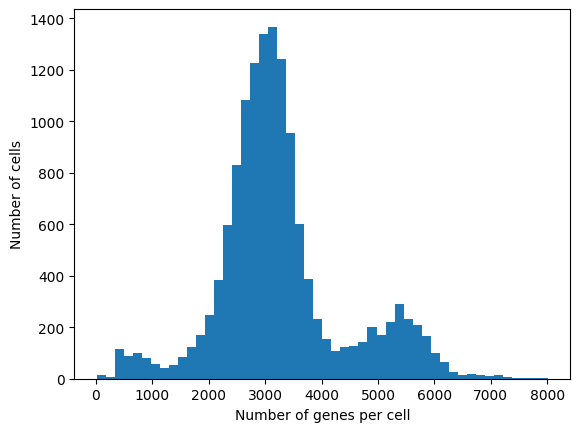

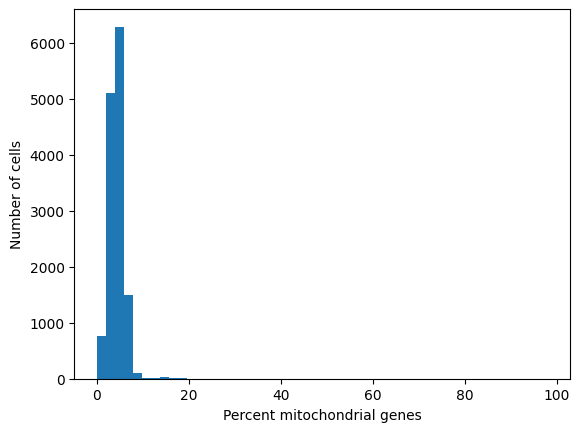

In [34]:
import scanpy as sc
import matplotlib.pyplot as plt

# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

# Plot histograms to decide thresholds
fig, ax = plt.subplots()
ax.hist(adata.obs['n_genes_by_counts'], bins=50)
ax.set_xlabel("Number of genes per cell")
ax.set_ylabel("Number of cells")
plt.show()

fig, ax = plt.subplots()
ax.hist(adata.obs['pct_counts_mt'], bins=50)
ax.set_xlabel("Percent mitochondrial genes")
ax.set_ylabel("Number of cells")
plt.show()
